# Fama-French 3-factor Model

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt 


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

# Estimation Stage

**Fama-French Model**

In [3]:
#returns data

wrds_return = pd.read_excel("wrds_data.xlsx", sheet_name='returns')
wrds_return = pd.DataFrame(wrds_return[wrds_return.columns[:-5]])
wrds_return['date'] = wrds_return['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m"))
wrds_return.set_index('date', inplace=True)
wrds_return.drop(columns=['Date'], inplace=True)
wrds_return['market_premium'] = wrds_return['S&P RETURN'] - wrds_return['RISK-FREE RATE']
wrds_return.head(4)


,MKT COMPOSITE RETURN,S&P RETURN,FAMA-FRENCH MARKET FACTOR,RISK-FREE RATE,FAMA-FRENCH SIZE FACTOR (SMB),FAMA-FRENCH VALUE FACTOR (HML),MOMENTUM FACTOR,BIOGEN INC,JOHNSON & JOHNSON,LILLY (ELI) & CO,MERCK & CO,PFIZER INC,BANK OF AMERICA CORP,CITIGROUP INC,GOLDMAN SACHS GROUP INC,JPMORGAN CHASE & CO,MORGAN STANLEY,ARCHER-DANIELS-MIDLAND CO,CONAGRA BRANDS INC,COLGATE-PALMOLIVE CO,CAMPBELL SOUP CO,KELLOGG CO,KRAFT HEINZ CO,COCA-COLA CO,PROCTER & GAMBLE CO,TYSON FOODS INC -CL A,WALMART INC,market_premium
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1963-01-01,NaN,0.0491,0.0493,0.0025,0.0307,0.0222,-0.0210,NaN,0.1024,0.0915,0.1079,0.0688,0.0608,NaN,NaN,0.0586,NaN,NaN,NaN,0.0724,0.0935,0.1511,NaN,0.0587,0.0337,NaN,NaN,0.0466
1963-02-01,NaN,-0.0289,-0.0238,0.0023,0.0050,0.0217,0.0252,NaN,0.0196,0.0365,-0.0640,-0.0307,0.0145,NaN,NaN,0.0341,NaN,NaN,NaN,0.0000,-0.1033,-0.0602,NaN,-0.0028,-0.0307,NaN,NaN,-0.0312
1963-03-01,NaN,0.0355,0.0308,0.0023,-0.0260,0.0207,0.0156,NaN,0.0033,-0.0145,0.0382,0.0103,0.0139,NaN,NaN,-0.0253,NaN,NaN,NaN,0.0722,0.0119,0.0992,NaN,0.0464,0.0423,NaN,NaN,0.0332
1963-04-01,NaN,0.0485,0.0451,0.0025,-0.0131,0.0099,-0.0008,NaN,0.0120,0.0501,0.0797,0.0787,0.1339,NaN,NaN,-0.0184,NaN,NaN,NaN,0.0459,0.0031,-0.0526,NaN,-0.0107,0.0561,NaN,NaN,0.0460


In [4]:
#convert to quarterly frequency

wrdsq_return = wrds_return.resample('Q').mean()
wrdsq_return.reset_index(inplace=True)
wrdsq_return['quarter_date'] = pd.PeriodIndex(wrdsq_return.date, freq='Q')
wrdsq_return.head(3)

,date,MKT COMPOSITE RETURN,S&P RETURN,FAMA-FRENCH MARKET FACTOR,RISK-FREE RATE,FAMA-FRENCH SIZE FACTOR (SMB),FAMA-FRENCH VALUE FACTOR (HML),MOMENTUM FACTOR,BIOGEN INC,JOHNSON & JOHNSON,LILLY (ELI) & CO,MERCK & CO,PFIZER INC,BANK OF AMERICA CORP,CITIGROUP INC,GOLDMAN SACHS GROUP INC,JPMORGAN CHASE & CO,MORGAN STANLEY,ARCHER-DANIELS-MIDLAND CO,CONAGRA BRANDS INC,COLGATE-PALMOLIVE CO,CAMPBELL SOUP CO,KELLOGG CO,KRAFT HEINZ CO,COCA-COLA CO,PROCTER & GAMBLE CO,TYSON FOODS INC -CL A,WALMART INC,market_premium,quarter_date
0,1963-03-31,NaN,0.018567,0.018767,0.002367,0.003233,0.021533,0.006600,NaN,0.041767,0.037833,0.027367,0.016133,0.029733,NaN,NaN,0.022467,NaN,NaN,NaN,0.048200,0.000700,0.063367,NaN,0.034100,0.015100,NaN,NaN,0.016200,1963Q1
1,1963-06-30,NaN,0.014200,0.014233,0.002400,-0.001600,0.014233,0.004867,NaN,0.020967,0.023467,0.029633,0.017300,0.057733,NaN,NaN,-0.003867,NaN,NaN,NaN,0.043067,0.000333,0.026900,NaN,0.003333,0.010067,NaN,NaN,0.011800,1963Q2
2,1963-09-30,NaN,0.011400,0.010367,0.002633,-0.006067,0.003500,0.007300,NaN,0.020300,0.004933,0.033233,-0.002067,-0.001900,NaN,NaN,-0.001900,NaN,NaN,NaN,0.011400,0.021067,0.021733,NaN,0.031200,0.016867,NaN,NaN,0.008767,1963Q3


In [5]:
#running stock-by-stock 3-factor Fama-French regressions
wrdsq_return.rename(columns={'RISK-FREE RATE':'rf', 'FAMA-FRENCH SIZE FACTOR (SMB)' : 'smb', 
                           'FAMA-FRENCH VALUE FACTOR (HML)': 'hml'}, inplace=True)


#renaming firms to gett rid of space
for firm in wrdsq_return.columns[7:-1]:
    firm_new = firm.replace(' ', '_').replace('-', '_')
    for pattern in ['&', '__', '(', ')']:
        firm_new = firm_new.replace(pattern, '')
    wrdsq_return.rename(columns={firm: firm_new}, inplace=True)
    
wrdsq_return.head(3)

,date,MKT COMPOSITE RETURN,S&P RETURN,FAMA-FRENCH MARKET FACTOR,rf,smb,hml,MOMENTUM_FACTOR,BIOGEN_INC,JOHNSONJOHNSON,LILLY_ELICO,MERCKCO,PFIZER_INC,BANK_OF_AMERICA_CORP,CITIGROUP_INC,GOLDMAN_SACHS_GROUP_INC,JPMORGAN_CHASECO,MORGAN_STANLEY,ARCHER_DANIELS_MIDLAND_CO,CONAGRA_BRANDS_INC,COLGATE_PALMOLIVE_CO,CAMPBELL_SOUP_CO,KELLOGG_CO,KRAFT_HEINZ_CO,COCA_COLA_CO,PROCTERGAMBLE_CO,TYSON_FOODS_INC_CL_A,WALMART_INC,market_premium,quarter_date
0,1963-03-31,NaN,0.018567,0.018767,0.002367,0.003233,0.021533,0.006600,NaN,0.041767,0.037833,0.027367,0.016133,0.029733,NaN,NaN,0.022467,NaN,NaN,NaN,0.048200,0.000700,0.063367,NaN,0.034100,0.015100,NaN,NaN,0.016200,1963Q1
1,1963-06-30,NaN,0.014200,0.014233,0.002400,-0.001600,0.014233,0.004867,NaN,0.020967,0.023467,0.029633,0.017300,0.057733,NaN,NaN,-0.003867,NaN,NaN,NaN,0.043067,0.000333,0.026900,NaN,0.003333,0.010067,NaN,NaN,0.011800,1963Q2
2,1963-09-30,NaN,0.011400,0.010367,0.002633,-0.006067,0.003500,0.007300,NaN,0.020300,0.004933,0.033233,-0.002067,-0.001900,NaN,NaN,-0.001900,NaN,NaN,NaN,0.011400,0.021067,0.021733,NaN,0.031200,0.016867,NaN,NaN,0.008767,1963Q3


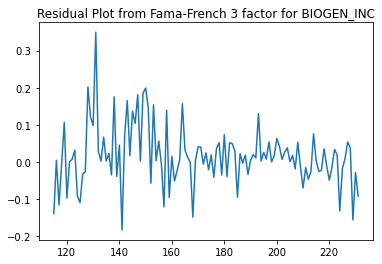

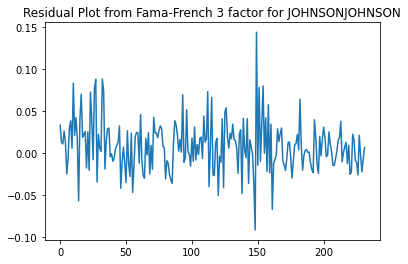

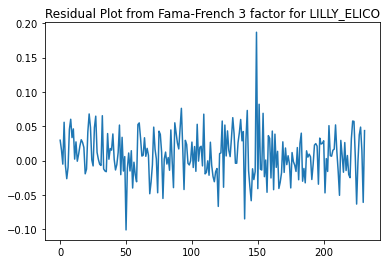

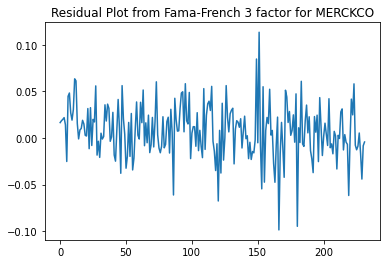

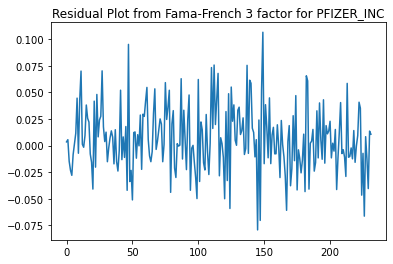

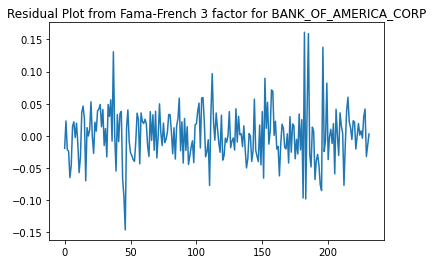

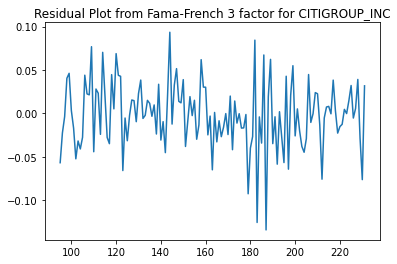

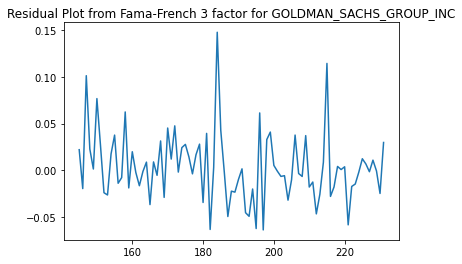

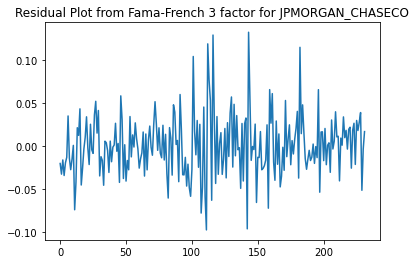

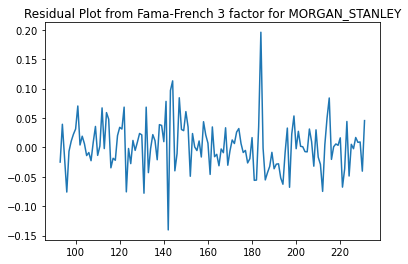

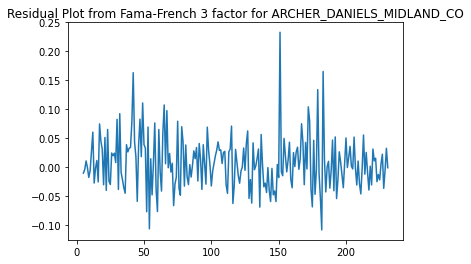

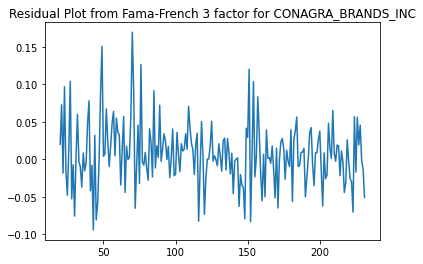

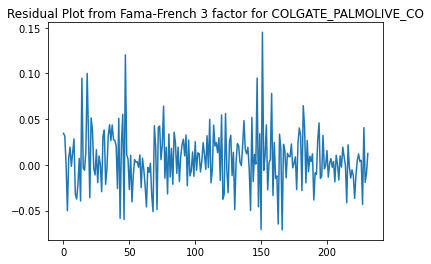

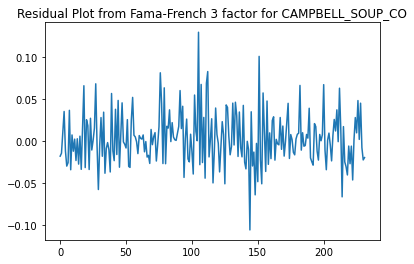

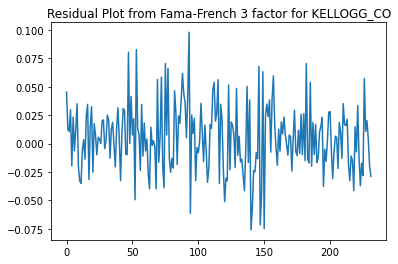

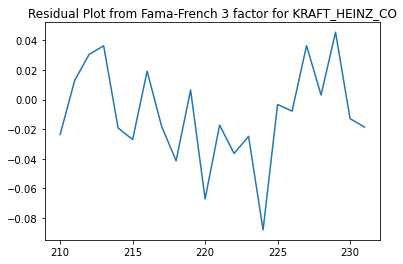

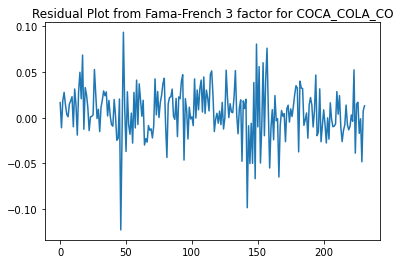

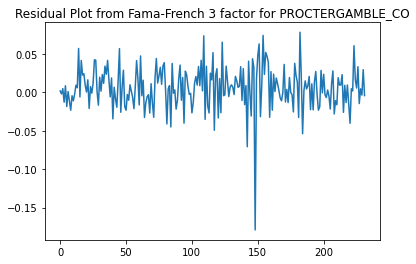

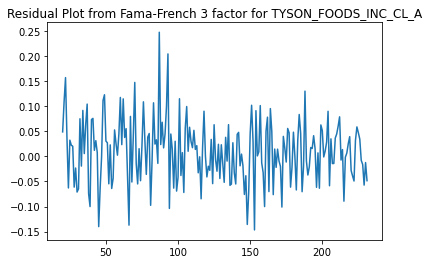

Number of firms:  19


{'BIOGEN_INC': {'market_premium': 1.0669888512085057,
  'smb': 0.368701061846293,
  'hml': -0.8886113946207012},
 'JOHNSONJOHNSON': {'market_premium': 0.7701372718491151,
  'smb': -0.17589635042728943,
  'hml': -0.2562963235604078},
 'LILLY_ELICO': {'market_premium': 0.7426161147095879,
  'smb': -0.29559415316595095,
  'hml': -0.24524168007299113},
 'MERCKCO': {'market_premium': 0.907235423635477,
  'smb': -0.5578910636270833,
  'hml': -0.20471893978652722},
 'PFIZER_INC': {'market_premium': 0.930098084311484,
  'smb': -0.4157592798462244,
  'hml': -0.16046455610528956},
 'BANK_OF_AMERICA_CORP': {'market_premium': 1.5756862985273825,
  'smb': 0.10603761891015902,
  'hml': 0.9616372511611931},
 'CITIGROUP_INC': {'market_premium': 1.8641584043045962,
  'smb': 0.42124456922425546,
  'hml': 0.9814139921485024},
 'GOLDMAN_SACHS_GROUP_INC': {'market_premium': 1.4200700349917936,
  'smb': 0.29249088422228653,
  'hml': 0.2356645988787126},
 'JPMORGAN_CHASECO': {'market_premium': 1.308840855066

In [6]:
#regressing and adding coefficients

rsquared = []
firm_parameters = {}
for n, firm in enumerate(wrdsq_return.columns[8:-3]): #for each firm
    firm_parameters[firm] = {}
    wrdsq_return['firm_minus_rf'] = wrdsq_return[firm] - wrdsq_return['rf']
    result = sm.ols(formula="firm_minus_rf ~ market_premium + smb + hml -1", 
                    data=wrdsq_return).fit(cov_type='HAC', cov_kwds={'maxlags':4})
    #residual plots
    plt.plot(result.resid)
    plt.title(f"Residual Plot from Fama-French 3 factor for {firm}")
    plt.savefig(f'residual{n}.png')
    plt.show()
    
    #adjusted r-squared
    rsquared.append(result.rsquared_adj)
    coeffs = dict(result.params)
    for coeff in coeffs:
        firm_parameters[firm][coeff] = coeffs[coeff]


print('Number of firms: ', len(firm_parameters))
firm_parameters

In [7]:
#adjusted R-squared values
rsquared

[0.15068645121993507,
 0.3127532268714759,
 0.24133712455968181,
 0.38352258491560065,
 0.3570829527318342,
 0.5217872885961112,
 0.67174593988736,
 0.5602080807881347,
 0.5354083398047378,
 0.5641672704017501,
 0.16159724406521914,
 0.3171964723742451,
 0.3407285372785509,
 0.2446598531507933,
 0.24462896635061104,
 0.3710040788740401,
 0.42493898217777104,
 0.3000801823782915,
 0.22274050566514558]

In [8]:
#sample regression result summary

print(f'OLS for firm {firm}')
result = sm.ols(formula="firm_minus_rf ~ market_premium + smb + hml -1", 
                data=wrdsq_return).fit(cov_type='HAC', cov_kwds={'maxlags':4})
result.summary()



OLS for firm TYSON_FOODS_INC_CL_A


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          firm_minus_rf   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):              0.223
Method:                 Least Squares   F-statistic:                              17.13
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                    5.55e-10
Time:                        17:41:56   Log-Likelihood:                          287.69
No. Observations:                 212   AIC:                                     -569.4
Df Residuals:                     209   BIC:                                     -559.3
Df Model:                           3                                                  
Covariance Type:                  HAC                                                  
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
market_premium     1.0147      0.183      5.551      0.000       0.656       1.373
smb                0.7080      0.295      2.396      0.017       0.129       1.287
hml                0.4168      0.272      1.532      0.126      -0.117       0.950
==============================================================================
Omnibus:                        6.450   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.347
Skew:                           0.262   Prob(JB):                       0.0254
Kurtosis:                       3.746   Cond. No.                         1.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

**Regressing the 3 factors on historical MEVSs**

In [9]:
mev_historic = pd.read_csv('2021-table_1a_historic_domestic.csv')

#renaming column names to get rid of space and stuff
for column_name in mev_historic.columns:
    column_name_new = column_name.replace(' ', '_').replace('-', '_').lower()
    for pattern in ['&', '__', '(', ')']:
        column_name_new = column_name_new.replace(pattern, '')

    correction_dictionary = {'3': 'three', '5': 'five', '10': 'ten'}
    for pattern in ['3', '5', '10']:
        column_name_new = column_name_new.replace(pattern, correction_dictionary[pattern])
    mev_historic.rename(columns={column_name: column_name_new}, inplace=True)

mev_historic.rename(columns={'date': 'Date'}, inplace=True)    
quarter_number = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
mev_historic['date_str'] = mev_historic['Date'].apply(lambda x: x.split(' ')[0] + '-' + quarter_number[x.split(' ')[1]])
mev_historic['date'] = pd.to_datetime(mev_historic.date_str)
mev_historic['quarter_date'] = pd.PeriodIndex(mev_historic.date, freq='Q')
mev_historic.drop(columns=['date', 'date_str', 'Date', 'scenario_name'], inplace=True)
mev_historic.head(2)

,real_gdp_growth,nominal_gdp_growth,real_disposable_income_growth,nominal_disposable_income_growth,unemployment_rate,cpi_inflation_rate,three_month_treasury_rate,five_year_treasury_yield,ten_year_treasury_yield,bbb_corporate_yield,mortgage_rate,prime_rate,dow_jones_total_stock_market_index_level,house_price_index_level,commercial_real_estate_price_index_level,market_volatility_index_level,quarter_date
0,9.3,14.0,4.9,9.6,7.7,4.7,4.9,7.4,7.6,NaN,8.9,6.8,NaN,23.3,50.9,NaN,1976Q1
1,3.0,7.2,2.3,5.8,7.6,3.6,5.2,7.4,7.6,NaN,8.8,6.9,NaN,23.5,51.8,NaN,1976Q2


In [10]:
wrds_for_mev = wrdsq_return[['market_premium', 'smb', 'hml', 'date']]
wrds_for_mev['quarter_date'] = pd.PeriodIndex(wrds_for_mev.date, freq='Q')
wrds_for_mev.drop(columns=['date'], inplace=True)
wrds_for_mev = pd.DataFrame(wrds_for_mev[wrds_for_mev['quarter_date'] >= '1976Q1'])
wrds_for_mev.head(2)


,market_premium,smb,hml,quarter_date
52,0.041833,0.035667,0.048067,1976Q1
53,0.001100,-0.008767,-0.002633,1976Q2


In [11]:
#check that the date ends at 2020Q4. It does

wrds_for_mev.tail(2)

,market_premium,smb,hml,quarter_date
230,0.028567,-0.0079,-0.022800,2020Q3
231,0.038867,0.0491,0.015933,2020Q4


In [12]:
#merge financial variables with MEVs

mev_wrds_merged = mev_historic.merge(wrds_for_mev, on='quarter_date', indicator='unmatched')
mev_wrds_merged.head(2)

,real_gdp_growth,nominal_gdp_growth,real_disposable_income_growth,nominal_disposable_income_growth,unemployment_rate,cpi_inflation_rate,three_month_treasury_rate,five_year_treasury_yield,ten_year_treasury_yield,bbb_corporate_yield,mortgage_rate,prime_rate,dow_jones_total_stock_market_index_level,house_price_index_level,commercial_real_estate_price_index_level,market_volatility_index_level,quarter_date,market_premium,smb,hml,unmatched
0,9.3,14.0,4.9,9.6,7.7,4.7,4.9,7.4,7.6,NaN,8.9,6.8,NaN,23.3,50.9,NaN,1976Q1,0.041833,0.035667,0.048067,both
1,3.0,7.2,2.3,5.8,7.6,3.6,5.2,7.4,7.6,NaN,8.8,6.9,NaN,23.5,51.8,NaN,1976Q2,0.001100,-0.008767,-0.002633,both


In [13]:
query_xvars = ' + '.join(mev_wrds_merged.columns[:-5])
query_xvars


'real_gdp_growth + nominal_gdp_growth + real_disposable_income_growth + nominal_disposable_income_growth + unemployment_rate + cpi_inflation_rate + three_month_treasury_rate + five_year_treasury_yield + ten_year_treasury_yield + bbb_corporate_yield + mortgage_rate + prime_rate + dow_jones_total_stock_market_index_level + house_price_index_level + commercial_real_estate_price_index_level + market_volatility_index_level'

In [14]:
variables = ['market_premium', 'smb', 'hml']

mev_regression_parameters = {}
for factor in variables: #for each factor
    #mev_regression_parameters[factor] = {}
    result = sm.ols(formula="{} ~ ".format(factor) + query_xvars + "-1", 
                    data=mev_wrds_merged).fit(cov_type='HAC',cov_kwds={'maxlags':4})
    mev_regression_parameters[factor] = dict(result.params)

print('Number of factors: ', len(mev_regression_parameters))
mev_regression_parameters


Number of factors:  3


{'market_premium': {'real_gdp_growth': 0.006903235983624461,
  'nominal_gdp_growth': -0.00671488960796416,
  'real_disposable_income_growth': 0.003446385812836069,
  'nominal_disposable_income_growth': -0.0035039096875344533,
  'unemployment_rate': 0.006158206107961497,
  'cpi_inflation_rate': 0.0026075900428089963,
  'three_month_treasury_rate': 0.00958859366946612,
  'five_year_treasury_yield': -0.012243677094589582,
  'ten_year_treasury_yield': 0.013337416009114669,
  'bbb_corporate_yield': 0.002952743333243335,
  'mortgage_rate': -0.007787954000739357,
  'prime_rate': -0.0013925291840561622,
  'dow_jones_total_stock_market_index_level': 3.0086525063243518e-06,
  'house_price_index_level': 0.0002655618046056952,
  'commercial_real_estate_price_index_level': -0.0003893830697577719,
  'market_volatility_index_level': -0.001006868544669547},
 'smb': {'real_gdp_growth': -0.0006675432838356714,
  'nominal_gdp_growth': 0.0002493877000679367,
  'real_disposable_income_growth': 0.0007911012

In [15]:
#sample regression on MEVs

result = sm.ols(formula="market_premium ~ " + query_xvars + "-1", 
                data=mev_wrds_merged).fit(cov_type='HAC', cov_kwds={'maxlags':4})
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         market_premium   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.350
Method:                 Least Squares   F-statistic:                              32.01
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                    1.21e-33
Time:                        17:41:56   Log-Likelihood:                          307.22
No. Observations:                 124   AIC:                                     -582.4
Df Residuals:                     108   BIC:                                     -537.3
Df Model:                          16                                                  
Covariance Type:                  HAC                                                  
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
real_gdp_growth                              0.0069      0.005      1.526      0.127      -0.002       0.016
nominal_gdp_growth                          -0.0067      0.004     -1.637      0.102      -0.015       0.001
real_disposable_income_growth                0.0034      0.006      0.577      0.564      -0.008       0.015
nominal_disposable_income_growth            -0.0035      0.006     -0.615      0.538      -0.015       0.008
unemployment_rate                            0.0062      0.002      3.675      0.000       0.003       0.009
cpi_inflation_rate                           0.0026      0.004      0.592      0.554      -0.006       0.011
three_month_treasury_rate                    0.0096      0.009      1.013      0.311      -0.009       0.028
five_year_treasury_yield                    -0.0122      0.017     -0.726      0.468      -0.045       0.021
ten_year_treasury_yield                      0.0133      0.016      0.852      0.394      -0.017       0.044
bbb_corporate_yield                          0.0030      0.006      0.518      0.605      -0.008       0.014
mortgage_rate                               -0.0078      0.015     -0.511      0.609      -0.038       0.022
prime_rate                                  -0.0014      0.007     -0.203      0.839      -0.015       0.012
dow_jones_total_stock_market_index_level  3.009e-06   5.43e-07      5.538      0.000    1.94e-06    4.07e-06
house_price_index_level                      0.0003      0.000      1.897      0.058   -8.82e-06       0.001
commercial_real_estate_price_index_level    -0.0004      0.000     -2.545      0.011      -0.001   -8.95e-05
market_volatility_index_level               -0.0010      0.000     -5.263      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        7.310   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                8.505
Skew:                           0.369   Prob(JB):                       0.0142
Kurtosis:                       4.050   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
[3] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simulation Stage

**Predict the factors for 2020 using the scenario**

In [16]:
#scenario1 data

scenario1 = pd.read_csv('2021-table_3a_supervisory_severely_adverse_domestic.csv')
quarter_number = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
scenario1['date_str'] = scenario1['Date'].apply(lambda x: x.split(' ')[0] + '-' + quarter_number[x.split(' ')[1]])
scenario1['date'] = pd.to_datetime(scenario1.date_str)
scenario1['quarter_date'] = pd.PeriodIndex(scenario1.date, freq='Q')
scenario1.drop(columns=['date_str', 'Date', 'Scenario Name', 'date'], inplace=True)
scenario1 = scenario1[scenario1['quarter_date'] < '2022Q1']


#change names
for column_name in scenario1.columns:
    column_name_new = column_name.replace(' ', '_').replace('-', '_').lower()
    for pattern in ['&', '__', '(', ')']:
        column_name_new = column_name_new.replace(pattern, '')

    correction_dictionary = {'3': 'three', '5': 'five', '10': 'ten'}
    for pattern in ['3', '5', '10']:
        column_name_new = column_name_new.replace(pattern, correction_dictionary[pattern])
    scenario1.rename(columns={column_name: column_name_new}, inplace=True)


scenario1

,real_gdp_growth,nominal_gdp_growth,real_disposable_income_growth,nominal_disposable_income_growth,unemployment_rate,cpi_inflation_rate,three_month_treasury_rate,five_year_treasury_yield,ten_year_treasury_yield,bbb_corporate_yield,mortgage_rate,prime_rate,dow_jones_total_stock_market_index_level,house_price_index_level,commercial_real_estate_price_index_level,market_volatility_index_level,quarter_date
0,-5.5,-4.8,2.8,3.8,7.8,1.3,0.1,0.3,0.3,4.9,3.5,3.2,23194.5,222.8,288.2,70.0,2021Q1
1,-4.0,-3.4,-9.9,-9.3,8.6,1.0,0.1,0.3,0.3,5.7,3.7,3.2,19178.4,213.3,279.3,65.8,2021Q2
2,-3.3,-2.9,-4.1,-3.4,9.3,1.0,0.1,0.3,0.3,6.0,3.8,3.2,17649.8,206.0,267.4,62.0,2021Q3
3,-1.0,-0.4,-0.6,0.2,9.7,1.2,0.1,0.3,0.3,6.0,3.8,3.2,17711.1,197.9,249.5,57.6,2021Q4


In [17]:
def predict_factors_2022(row, dict_coeffs):
    '''
    predict the three factors using a scenario.
    The scenario will be in the dataset the row
    of which is passed in the apply function. 
    
    dict_coeffs contains the regression coefficients
    from regressing factors on historical MEV
    data.
    '''
    data_row = dict(row)
    results = {}
    for factor in mev_regression_parameters:
        factor_value = 0
        for variable in mev_regression_parameters[factor]:
            coeff = mev_regression_parameters[factor][variable]
            xvalue = data_row[variable]
            factor_value += coeff*xvalue
        results[factor] = factor_value

    return results['market_premium'], results['smb'], results['hml']


    

In [18]:
#Predict factors. Using 3 month treasury as risk-free return

scenario1['mkt_premium_hat'],\
    scenario1['smb_hat'],\
        scenario1['hml_hat'] = zip(*scenario1.apply(lambda x: predict_factors_2022(x, mev_regression_parameters), axis=1))

predicted_factors = pd.DataFrame(scenario1[['quarter_date', 'mkt_premium_hat', 'smb_hat', 'hml_hat']])#, 'three_month_treasury_rate']])
predicted_factors.rename(columns={'mkt_premium_hat': 'market_premium',
                                 'smb_hat': 'smb',
                                 'hml_hat': 'hml'}, inplace=True)#, 
                                 #'three_month_treasury_rate': 'rf'}, inplace=True)
predicted_factors 


,quarter_date,market_premium,smb,hml
0,2021Q1,-0.027686,0.001068,-0.008396
1,2021Q2,-0.026562,-0.001685,0.000107
2,2021Q3,-0.019431,0.001257,0.002504
3,2021Q4,-0.008475,0.006708,0.006725


In [19]:
predicted_factors_array = np.array(predicted_factors)
predicted_factors_array


array([[Period('2021Q1', 'Q-DEC'), -0.027685576854985197,
        0.0010676156355340326, -0.008396193240828909],
       [Period('2021Q2', 'Q-DEC'), -0.026562088772988837,
        -0.0016847051746947013, 0.0001065806165593125],
       [Period('2021Q3', 'Q-DEC'), -0.019431394349892966,
        0.001256501598444093, 0.0025038569002951774],
       [Period('2021Q4', 'Q-DEC'), -0.008474541359376836,
        0.006708413631774931, 0.006724548671305432]], dtype=object)

**Forecasting the Stock Returns using predicted factors from historical MEVs**

In [20]:
forecasted_returns = {}
for date in [pd.Period('2021Q1', 'Q-DEC'), 
             pd.Period('2021Q2', 'Q-DEC'), 
             pd.Period('2021Q3', 'Q-DEC'), 
             pd.Period('2021Q4', 'Q-DEC')]:
    forecasted_returns[date] = {}
    
forecasted_returns

{Period('2021Q1', 'Q-DEC'): {},
 Period('2021Q2', 'Q-DEC'): {},
 Period('2021Q3', 'Q-DEC'): {},
 Period('2021Q4', 'Q-DEC'): {}}

In [21]:
#forecasted stock returns

for predicted_scenario in predicted_factors_array: #forecasted factors from MEV regression
    dict_predicted_values = dict(zip(predicted_factors[1:], predicted_scenario)) #make it a dictionary
    forecasted_returns[dict_predicted_values['quarter_date']] = [] #for a date, make a list
    for firm in firm_parameters: #firm with its estimated factor coefficients
        forecast_return = 0
        for variable in firm_parameters[firm]: #iterate over factor coefficients
            forecast_return += firm_parameters[firm][variable]*dict_predicted_values[variable]
        
        forecast_return += 0.1 #add in risk-free return (3 month treasury)
        forecasted_returns[dict_predicted_values['quarter_date']].append(forecast_return)
        
scenario1_forecasts = pd.DataFrame.from_dict(forecasted_returns, orient='index')
scenario1_forecasts.columns = list(firm_parameters.keys())
scenario1_forecasts

,BIOGEN_INC,JOHNSONJOHNSON,LILLY_ELICO,MERCKCO,PFIZER_INC,BANK_OF_AMERICA_CORP,CITIGROUP_INC,GOLDMAN_SACHS_GROUP_INC,JPMORGAN_CHASECO,MORGAN_STANLEY,ARCHER_DANIELS_MIDLAND_CO,CONAGRA_BRANDS_INC,COLGATE_PALMOLIVE_CO,CAMPBELL_SOUP_CO,KELLOGG_CO,KRAFT_HEINZ_CO,COCA_COLA_CO,PROCTERGAMBLE_CO,TYSON_FOODS_INC_CL_A
2021Q1,0.078314,0.080642,0.081184,0.076006,0.075153,0.048415,0.040599,0.059018,0.057272,0.054390,0.080213,0.072999,0.076518,0.077442,0.078261,0.084966,0.072830,0.078439,0.069165
2021Q2,0.070943,0.079813,0.080746,0.076820,0.075978,0.058070,0.049879,0.061812,0.064580,0.054796,0.080098,0.074010,0.076948,0.080673,0.081624,0.084939,0.074666,0.080736,0.071900
2021Q3,0.077505,0.084172,0.084584,0.081158,0.081003,0.071923,0.066763,0.073364,0.077198,0.067963,0.085431,0.082284,0.082487,0.085917,0.086531,0.092102,0.080915,0.084781,0.082217
2021Q4,0.087456,0.090570,0.090075,0.087192,0.088250,0.093825,0.093628,0.091512,0.097445,0.088592,0.093654,0.095439,0.090797,0.093913,0.093976,0.104182,0.090306,0.090567,0.098953


In [22]:
#return on total portfolio

pd.DataFrame(scenario1_forecasts.mean(axis=1)).rename(columns={0: 'Portfolio Return SC1'})

,Portfolio Return SC1
2021Q1,0.070623
2021Q2,0.072581
2021Q3,0.080437
2021Q4,0.092649


**Scenario 2**

In [23]:
#scenario1 data

scenario2 = pd.read_csv('2021-table_2a_supervisory_baseline_domestic.csv')
quarter_number = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
scenario2['date_str'] = scenario2['Date'].apply(lambda x: x.split(' ')[0] + '-' + quarter_number[x.split(' ')[1]])
scenario2['date'] = pd.to_datetime(scenario2.date_str)
scenario2['quarter_date'] = pd.PeriodIndex(scenario2.date, freq='Q')
scenario2.drop(columns=['date_str', 'Date', 'Scenario Name', 'date'], inplace=True)
scenario2 = scenario2[scenario2['quarter_date'] < '2022Q1']


#change names
for column_name in scenario2.columns:
    column_name_new = column_name.replace(' ', '_').replace('-', '_').lower()
    for pattern in ['&', '__', '(', ')']:
        column_name_new = column_name_new.replace(pattern, '')

    correction_dictionary = {'3': 'three', '5': 'five', '10': 'ten'}
    for pattern in ['3', '5', '10']:
        column_name_new = column_name_new.replace(pattern, correction_dictionary[pattern])
    scenario2.rename(columns={column_name: column_name_new}, inplace=True)


scenario2

,real_gdp_growth,nominal_gdp_growth,real_disposable_income_growth,nominal_disposable_income_growth,unemployment_rate,cpi_inflation_rate,three_month_treasury_rate,five_year_treasury_yield,ten_year_treasury_yield,bbb_corporate_yield,mortgage_rate,prime_rate,dow_jones_total_stock_market_index_level,house_price_index_level,commercial_real_estate_price_index_level,market_volatility_index_level,quarter_date
0,2.3,4.1,11.8,13.7,6.6,2.1,0.1,0.4,1.0,2.4,2.7,3.2,39528.3,226.9,294.1,32.8,2021Q1
1,4.4,6.4,-5.7,-4.3,6.2,1.8,0.1,0.5,1.1,2.6,2.7,3.2,39847.1,228.9,289.6,29.2,2021Q2
2,4.8,6.8,-0.5,1.3,5.8,2.2,0.1,0.6,1.2,2.7,2.8,3.2,40176.7,230.9,285.1,27.3,2021Q3
3,4.2,6.0,1.5,3.3,5.5,2.1,0.1,0.6,1.3,2.8,2.8,3.2,40515.0,233.0,288.1,26.5,2021Q4


In [24]:
#predict factors

scenario2['mkt_premium_hat'],\
    scenario2['smb_hat'],\
        scenario2['hml_hat'] = zip(*scenario2.apply(lambda x: predict_factors_2022(x, mev_regression_parameters), axis=1))

predicted_factors_scenario2 = pd.DataFrame(scenario2[['quarter_date', 'mkt_premium_hat', 'smb_hat', 'hml_hat']])#, 'three_month_treasury_rate']])
predicted_factors_scenario2.rename(columns={'mkt_premium_hat': 'market_premium',
                                 'smb_hat': 'smb',
                                 'hml_hat': 'hml'}, inplace=True)#, 
                                 #'three_month_treasury_rate': 'rf'}, inplace=True)
predicted_factors_scenario2



,quarter_date,market_premium,smb,hml
0,2021Q1,0.049772,0.022774,-0.007592
1,2021Q2,0.055905,0.025206,0.002861
2,2021Q3,0.057673,0.029952,0.005259
3,2021Q4,0.059522,0.031700,0.004799


In [25]:
predicted_factors_array_sc2 = np.array(predicted_factors_scenario2)
predicted_factors_array_sc2


array([[Period('2021Q1', 'Q-DEC'), 0.04977214724125632,
        0.022774324786412933, -0.007591763511779988],
       [Period('2021Q2', 'Q-DEC'), 0.05590491506456087,
        0.025205937814096042, 0.0028609790690896017],
       [Period('2021Q3', 'Q-DEC'), 0.05767322151409951,
        0.029951577350089405, 0.005258661303897388],
       [Period('2021Q4', 'Q-DEC'), 0.059521791517489674,
        0.0317002737358294, 0.004798919074176809]], dtype=object)

In [26]:
forecasted_returns_sc2 = {}
for date in [pd.Period('2021Q1', 'Q-DEC'), 
             pd.Period('2021Q2', 'Q-DEC'), 
             pd.Period('2021Q3', 'Q-DEC'), 
             pd.Period('2021Q4', 'Q-DEC')]:
    forecasted_returns_sc2[date] = {}
    
forecasted_returns_sc2

{Period('2021Q1', 'Q-DEC'): {},
 Period('2021Q2', 'Q-DEC'): {},
 Period('2021Q3', 'Q-DEC'): {},
 Period('2021Q4', 'Q-DEC'): {}}

In [27]:
#forecasted stock returns

for predicted_scenario in predicted_factors_array_sc2: #forecasted factors from MEV regression
    dict_predicted_values = dict(zip(predicted_factors_scenario2[1:], predicted_scenario)) #make it a dictionary
    forecasted_returns_sc2[dict_predicted_values['quarter_date']] = []
    for firm in firm_parameters: #firm with its estimated coefficients
        forecast_return = 0
        for variable in firm_parameters[firm]: #factor coefficients
            forecast_return += firm_parameters[firm][variable]*dict_predicted_values[variable]
        
        forecast_return += 0.1 #add back risk-free rate (3 month treasury)
        forecasted_returns_sc2[dict_predicted_values['quarter_date']].append(forecast_return)
        
scenario2_forecasts = pd.DataFrame.from_dict(forecasted_returns_sc2, orient='index')
scenario2_forecasts.columns = list(firm_parameters.keys())
scenario2_forecasts

,BIOGEN_INC,JOHNSONJOHNSON,LILLY_ELICO,MERCKCO,PFIZER_INC,BANK_OF_AMERICA_CORP,CITIGROUP_INC,GOLDMAN_SACHS_GROUP_INC,JPMORGAN_CHASECO,MORGAN_STANLEY,ARCHER_DANIELS_MIDLAND_CO,CONAGRA_BRANDS_INC,COLGATE_PALMOLIVE_CO,CAMPBELL_SOUP_CO,KELLOGG_CO,KRAFT_HEINZ_CO,COCA_COLA_CO,PROCTERGAMBLE_CO,TYSON_FOODS_INC_CL_A
2021Q1,0.168249,0.136271,0.132091,0.134004,0.138043,0.173540,0.194926,0.175552,0.168897,0.193623,0.139495,0.155665,0.141094,0.130821,0.128206,0.146044,0.142797,0.126734,0.163461
2021Q2,0.166401,0.137888,0.133364,0.136071,0.141058,0.193513,0.217641,0.187436,0.186664,0.204653,0.143353,0.163773,0.144918,0.137195,0.134354,0.154248,0.148298,0.130412,0.175761
2021Q3,0.167907,0.137800,0.132686,0.134537,0.140345,0.199108,0.225290,0.191900,0.193061,0.209645,0.144842,0.167659,0.145484,0.138120,0.135048,0.160519,0.148932,0.129558,0.181915
2021Q4,0.170933,0.139034,0.133655,0.135333,0.141411,0.201764,0.229021,0.194928,0.195871,0.213528,0.146396,0.170067,0.146895,0.139052,0.135846,0.163091,0.150308,0.130123,0.184837


### Comparing Equally-Weighted Portfolio Returns 

In [28]:
#return on total portfolio

p_ret_sc1 = pd.DataFrame(scenario1_forecasts.mean(axis=1)).rename(columns={0: 'Severe'})
p_ret_sc2 = pd.DataFrame(scenario2_forecasts.mean(axis=1)).rename(columns={0: 'Baseline'})
p_ret_sc1.merge(p_ret_sc2, left_index=True, right_index=True)

,Severe,Baseline
2021Q1,0.070623,0.152080
2021Q2,0.072581,0.159842
2021Q3,0.080437,0.162335
2021Q4,0.092649,0.164321


### Back Test

In [29]:
tickers = ['BIIB', 'JNJ', 'LLY', 'MRK',
            'PFE', 'BAC', 'C', 'GS', 'JPM',
           'MS', 'ADM', 'CAG', 'CL', 'CPB', 
           'K', 'KHC', 'KO', 'PG', 'TSN', 'WMT']

In [30]:
backtest = pd.read_csv('back-test.csv')
backtest = backtest[backtest['TICKER'].isin(tickers)]
backtest['date'] = backtest['date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d"))
backtest.set_index('date', inplace=True)
backtest['RET'] = backtest['RET'].astype(float)
backtestq = backtest[['RET']].resample('Q').mean()
backtestq.reset_index(inplace=True)
backtestq['quarter_date'] = pd.PeriodIndex(backtestq.date, freq='Q')
backtestq = pd.DataFrame(backtestq[['quarter_date', 'RET']]).set_index('quarter_date')
backtestq.rename(columns={'RET': 'Realized Returns'}, inplace=True)
backtestq

,Realized Returns
quarter_date,
2021Q1,0.029222
2021Q2,0.020324
2021Q3,-0.001565
2021Q4,0.021404


In [31]:
#Have all required tickers

backtest['TICKER'].unique()

array(['ADM', 'KO', 'KHC', 'PG', 'CL', 'PFE', 'JNJ', 'MRK', 'CPB', 'K',
       'JPM', 'LLY', 'WMT', 'CAG', 'BAC', 'MS', 'C', 'BIIB', 'TSN', 'GS'],
      dtype=object)

In [32]:
#comparing with our two projections

p_ret_sc1.merge(p_ret_sc2, left_index=True, right_index=True).merge(backtestq, left_index=True, right_index=True)

,Severe,Baseline,Realized Returns
2021Q1,0.070623,0.152080,0.029222
2021Q2,0.072581,0.159842,0.020324
2021Q3,0.080437,0.162335,-0.001565
2021Q4,0.092649,0.164321,0.021404


### Back Testing using Realized Returns from WRDS

We download the realized returns for the 20 tickers from WRDS to compare our projections with the actual realized portfolio returns. The realized returns are closer to our severe scenario projections (see above), which would be inline with the market stress due to the COVID-19 pandemic. If anything, the true returns reflect that the market was under greater stress i.e., MEVs were considerably worse than those given by the Fed Severe scenario (which is also intuitive since COVID was one very big unanticipated shock)

### Performance Testing

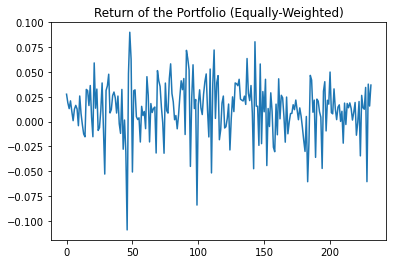

In [33]:
#check stationarity in the historical portfolio

plt.plot(wrdsq_return[wrdsq_return.columns[7:-2]].mean(axis=1))
plt.title('Return of the Portfolio (Equally-Weighted)')
plt.show()

**Comment on Stationarity:** The historical portfolio return is quite stationary over time as it is also expressed in percentage change, which usually induces stationarity in series. However, some variables in the historical and scenario MEVs could be non-stationary e.g., house price index, dow_jones_total_stock_market_index_level. Removing the trend from these series could improve performance.


**Notes:**

1. We run stock-by-stock estimation of Fama-French 3 factor model to get $\beta$ coefficients. We utilize the maximum available period for each stock to get better coverage. 

2. Fama-French method would proceed in two steps. First, I estimate the 3-factor model for each stock. Then, I regress each of those three factors on historical MEVs. Using the scenario values for those MEVs, then, I forecast the factors and eventually the returns. In sum, there are two regressions (one corresponding to each step). In the first classic 3-factor regression, we get an adjusted-R squared of around ~0.30. The R-squared for the 2nd-step regression is higher and around ~0.40. I use heteroskedasticity and autocorrelation-adjusted (HAC) standard errors.

3. The forecasted portfolio return is lower under the 'Severe' scenario and high under the 'Baseline' scenario. This result is both intuitive and according to expectations.

4. The $\beta$ coefficients should be estimated using data on both the 'normal' and 'stress' periods. The reason is as follows: using one specific state of the business cycle (i.e., boom or bust) for estimation would wrongfully capture the effect of macroeconomic shocks and label them as the effect of systemic risk, and hence generating an estimate of $\beta$ that is specific to that time period. It is, hence, desirable to use both periods and make use of all the variation in the data to estimate the true $\beta$

5. The Fama-French model is balanced when it comes to complexity and interpretability. It uses a theoretical structure (Fama-French factors) and links it back to fluctuations in the macroeconomy. CAPM, arguably, is too simple and the 'general factor model' is theory-less (a pure reduced-form structure). Fama-French (with MEVs) model seems to be a decent balance between theory and forecasting using MEVs. 

6. Model performance would be equally affected by noise and bias in the data. Under high bias, the projected average portfolio returns would be far away from the 'true' returns. While more noise may give us the true projections, but the standard errors are going to be too large to make any confident/reliable statement.

7. CAPM seems to be more sensitive to the law of small numbers simply because the returns are modelled as a function of two variables. Hence, any change in those variables would change the projections by a lot. Multi-factor regression, on the other hand, models stock returns as a function of a _number_ of macroeconomic variables, making it robust to changes in any one variable. 

8. Model selection is an important part of stress testing. In the end what matters is the _out-of-sample_ performance of a forecasting model (not part of this assignment). So, a model could have robust in-sample forecasts, but could miserably fail when it comes to out-of-sample forecasts. Therefore, choosing the 'best' model needs to incorporate some kind of out-of-sample evaluation. 

9. The residual plots from Fama-French 3 factor model are more or less stable and stationary (i.e., the residuals have an average of 0 and oscillate around mean zero). This re-ensures that we don't have a potential model misspecification.  